In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

왜 255로 나눌까?

1. **안정적인 학습**: 이미지의 픽셀 값이 크면, 컴퓨터는 이 값을 처리하는 데 어려움을 겪을 수 있습니다. 0과 1 사이의 값으로 바꾸면 컴퓨터가 더 쉽게 데이터를 학습할 수 있어요.
2. **빠른 학습**: 작은 값으로 데이터를 바꾸면, 컴퓨터는 학습하는 속도가 빨라집니다.
3. **계산 문제 방지**: 큰 숫자를 계속 계산하다 보면 컴퓨터가 계산에 틀릴 확률이 높아집니다. 작은 값으로 바꾸면 이런 문제를 줄일 수 있어요.
4. **더 좋은 결과**: 픽셀 값을 0과 1 사이로 바꾸면, 컴퓨터가 이미지를 더 잘 인식하고, 더 좋은 결과를 얻을 수 있습니다.

간단히 말해서, 이미지의 픽셀 값을 0과 1 사이로 바꾸는 것은 컴퓨터가 이미지를 더 잘 이해하고 빠르게 학습하게 만드는 방법입니다!

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input
    Dense(128, activation='relu'),  # Hidden Layer
    # Hidden Layer에 activation function을 쓸지 의사결정은?
    # 주로 논문을 바탕으로 진행 (reference를 참고)
    # 실제로는 실험을 통해서 진행 -> 마구잡이로 사용하는 것은 자제
    # 딥러닝은 해석이 어려움 -> 현업에서는 머시러닝 모델과 성능을 비교하는 용도?(테스트 모델)
    Dense(10, activation='softmax') # Output
])

model.compile(optimizer='adam',     # Gradient Descent 기반 가중치 학습 optimizer?
              loss='sparse_categorical_crossentropy',  # Loss Function
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2595 - accuracy: 0.9246 - val_loss: 0.1402 - val_accuracy: 0.9581
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1132 - accuracy: 0.9662 - val_loss: 0.0992 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0752 - val_accuracy: 0.9775


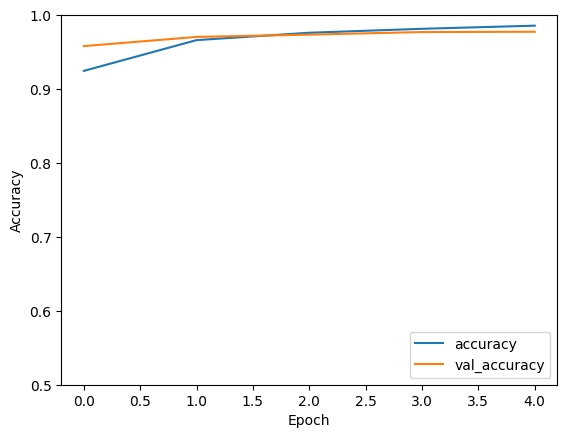

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

---

Tensor의 개념

[딥러닝에 대한 개요](https://paullabworkspace.notion.site/7ce5277237cc481fb0595eba99956749)

In [3]:
tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [5]:
tf.zeros([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [6]:
x = tf.constant([1, 2, 3])
y = tf.constant([4, 5, 6])

z = x + y

w = x * y

In [8]:
z, w

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([5, 7, 9], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 4, 10, 18], dtype=int32)>)

In [10]:
x = tf.constant([[1, 2], [3, 4]])
y = tf.reshape(x, [4])             # 2차원 텐서 X를 1차원으로 flatten

x, y

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>,
 <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>)

SLP 구조

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [16]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [17]:
# 어떻게 학습할건지? 어떻게 오차를 줄여나갈 것인지?
model.compile(loss='mean_squared_error', optimizer='sgd')

In [18]:
# 어느정도 ‘ys = 2xs - 1’의 관계를 갖도록 설정된 값
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 534ms/step - loss: 0.6898
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6606
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6352
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6129
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5929
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5750
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5586
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5436
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5296
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.5165
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5042
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4925
Epoch 13/500
1/1 [==============================] - 0s 11

In [19]:
# 작은 오차가 발생하는 이유는 ‘여섯 개’라는 적은 양의 입출력 데이터를 훈련에 사용했기 때문
# 입출력의 관계가 ‘y = 2x - 1’이 아닐 가능성이 있기 때문

pred = model.predict([5.0])
print(pred)

1/1 [==============================] - 0s 189ms/step
[[8.996458]]


---

In [27]:
tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])
model.compile(loss='mean_squared_error', optimizer='SGD') # mse

In [24]:
# 모델의 손실 함수를 Mean Squared Error로 지정했기 때문에, 손실 값 0.3333은 아래와 같이 계산된 결과입니다.
# 𝑙𝑜𝑠𝑠=(0−0)^2+(1−0)^2+(0−0)^2 / 3 = 0.3333

model.evaluate([0], [[0, 1, 0]])

1/1 [==============================] - 1s 511ms/step - loss: 0.3333


0.3333333432674408

In [30]:
model.fit([1], [[0, 1, 0]], epochs=1)

1/1 [==============================] - 0s 6ms/step - loss: 0.4943


In [31]:
model.evaluate([1], [[0, 1, 0]])

1/1 [==============================] - 0s 48ms/step - loss: 0.4812


0.48117199540138245

In [32]:
history = model.fit([1], [[0, 1, 0]], epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4812
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4684
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4560
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4439
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4322
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4207
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4096
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3987
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3882
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3779
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3679
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.3581
Epoch 13/100
1/1 [==============================] 

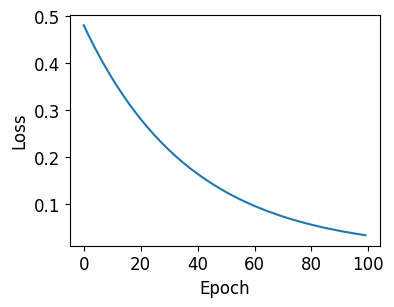

In [33]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

1/1 [==============================] - 0s 111ms/step
[[0.52498937 0.6146985  0.1131227 ]]
[array([[0.52498937, 0.6146985 , 0.1131227 ]], dtype=float32)]


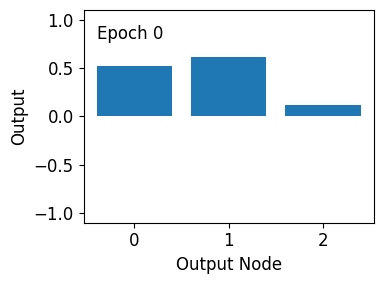

1/1 [==============================] - 0s 37ms/step


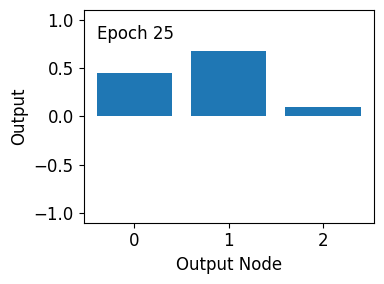

1/1 [==============================] - 0s 44ms/step


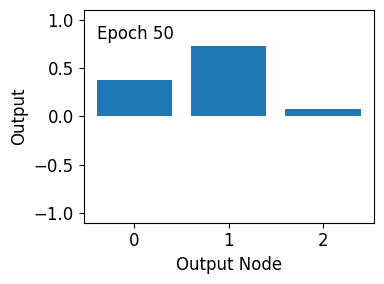

1/1 [==============================] - 0s 45ms/step


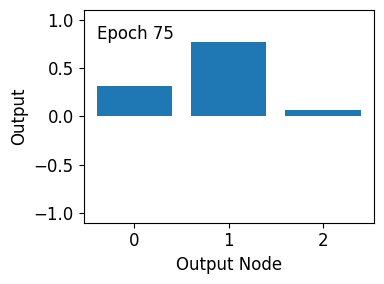

1/1 [==============================] - 0s 43ms/step


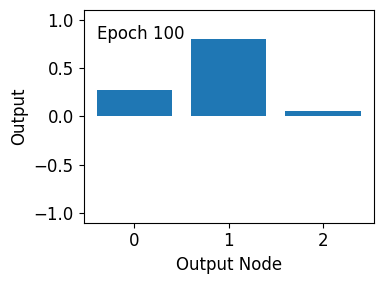

1/1 [==============================] - 0s 43ms/step


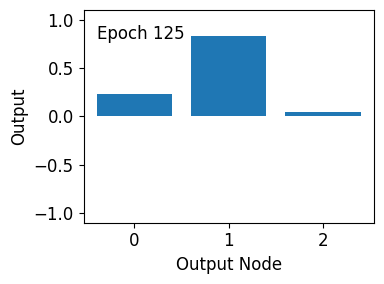

1/1 [==============================] - 0s 41ms/step


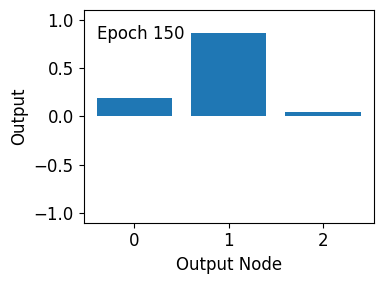

1/1 [==============================] - 0s 40ms/step


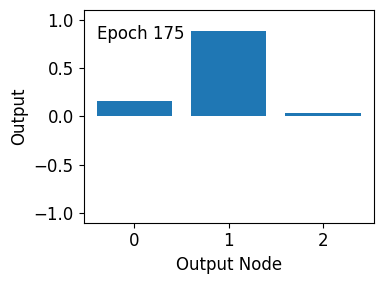

1/1 [==============================] - 0s 38ms/step


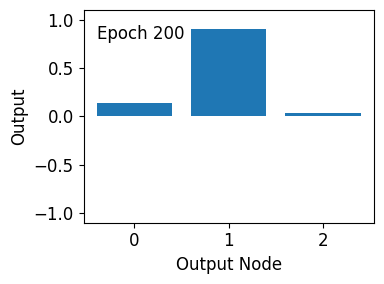

1/1 [==============================] - 0s 44ms/step


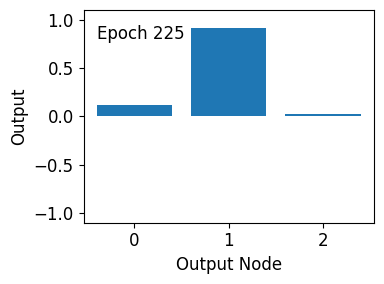

1/1 [==============================] - 0s 36ms/step


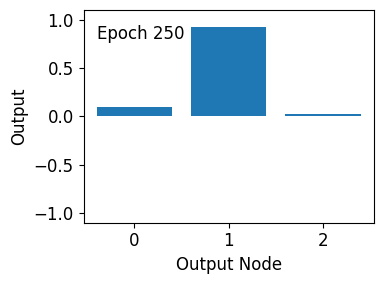

1/1 [==============================] - 0s 66ms/step


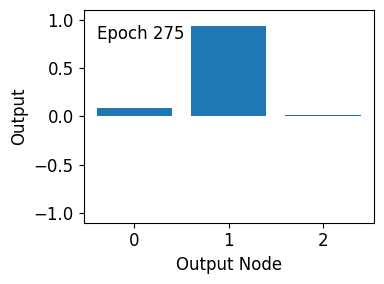

1/1 [==============================] - 0s 37ms/step


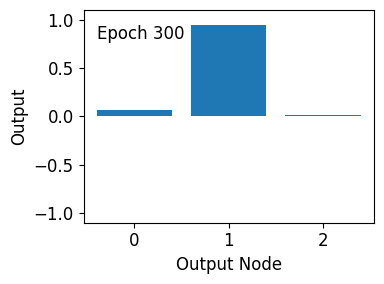

1/1 [==============================] - 0s 41ms/step


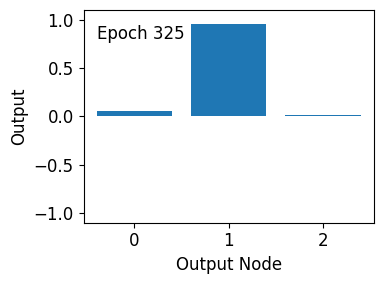

1/1 [==============================] - 0s 36ms/step


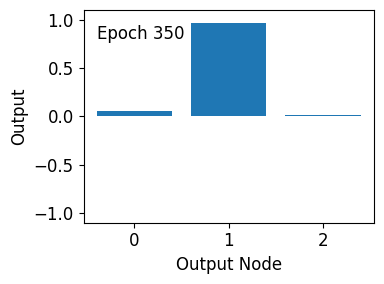

1/1 [==============================] - 0s 41ms/step


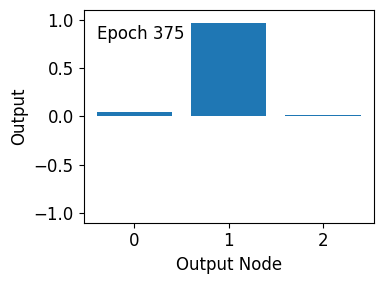

1/1 [==============================] - 0s 68ms/step


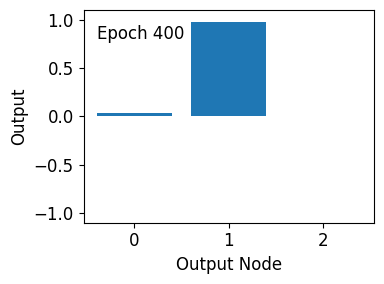

1/1 [==============================] - 0s 37ms/step


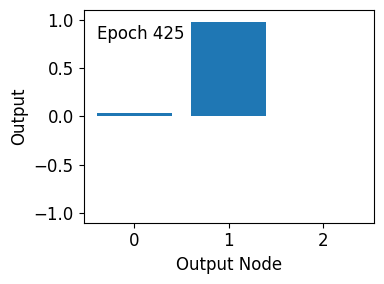

1/1 [==============================] - 0s 74ms/step


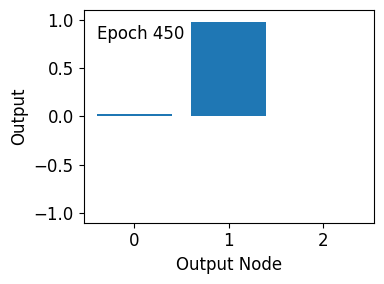

1/1 [==============================] - 0s 41ms/step


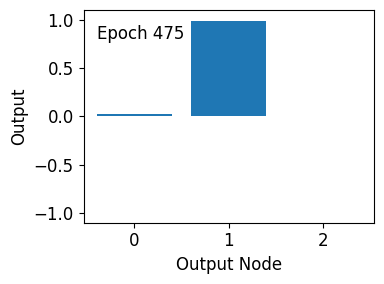

1/1 [==============================] - 0s 40ms/step


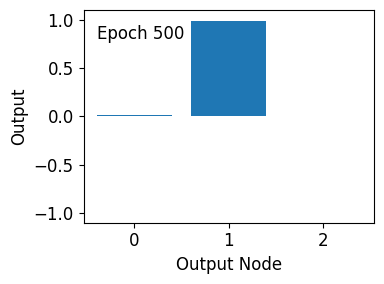

[[0.0185206  0.98640716 0.00399075]]
[array([[0.0185206 , 0.98640716, 0.00399075]], dtype=float32)]


<Figure size 400x300 with 0 Axes>

In [34]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)

# Modify the code to display the plots directly

# Initialize the model
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1], use_bias=False)])
model.compile(loss='mse', optimizer='SGD')

# Initial prediction and plot
pred = model.predict([1])
print(pred)
print(model.get_weights())

plt.bar(np.arange(3), pred[0])
plt.ylim(-1.1, 1.1)
plt.xlabel('Output Node')
plt.ylabel('Output')
plt.text(-0.4, 0.8, 'Epoch 0')
plt.tight_layout()
plt.show()  # Display the plot
plt.clf()  # Clear the figure

# Training and plotting at intervals
epochs = 500
for i in range(1, epochs+1):
    model.fit([1], [[0, 1, 0]], epochs=1, verbose=0)
    pred = model.predict([1])

    if i % 25 == 0:
        plt.bar(np.arange(3), pred[0])
        plt.ylim(-1.1, 1.1)
        plt.xlabel('Output Node')
        plt.ylabel('Output')
        plt.text(-0.4, 0.8, 'Epoch ' + str(i))
        plt.tight_layout()
        plt.show()  # Display the plot
        plt.clf()  # Clear the figure

# Print final predictions and weights
print(pred)
print(model.get_weights())

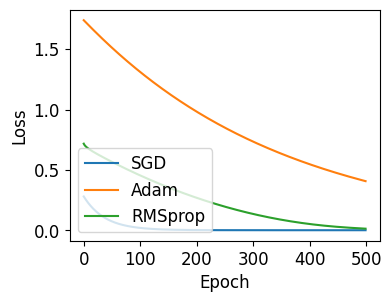

In [36]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

tf.random.set_seed(0)
model = keras.Sequential([keras.layers.Dense(units=3, input_shape=[1])])

tf.random.set_seed(0)
model2 = tf.keras.models.clone_model(model)

tf.random.set_seed(0)
model3 = tf.keras.models.clone_model(model)

model.compile(loss='mse', optimizer='SGD')
model2.compile(loss='mse', optimizer='Adam')
model3.compile(loss='mse', optimizer='RMSprop')

history = model.fit([1], [[0, 1, 0]], epochs=500, verbose=0)
history2 = model2.fit([1], [[0, 1, 0]], epochs=500, verbose=0)
history3 = model3.fit([1], [[0, 1, 0]], epochs=500, verbose=0)

loss = history.history['loss']
loss2 = history2.history['loss']
loss3 = history3.history['loss']
plt.plot(loss, label='SGD')
plt.plot(loss2, label='Adam')
plt.plot(loss3, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()